In [1]:
from jcopdl.callback import set_config

In [2]:
data = "damped_sine"

config = set_config({
    "input_size": 1,
    "seq_len": 14,
    "batch_size": 32,
    "output_size": 1,
    "hidden_size": 256,
    "num_layers": 2,
    "dropout": 0.2,
    "bidirectional": False,
    "cell_type": "lstm"
})

lr = 0.0005

# Jangan edit code di bawah ini

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from jcopdl.callback import Callback
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader
from utils import data4pred, pred4pred

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
from jcopdl.layers import rnn_block

class RNN(nn.Module):
    def __init__(self, cell_type, input_size, output_size, hidden_size, num_layers, dropout, bidirectional):
        super().__init__()
        
        self.rnn = rnn_block(input_size, hidden_size, num_layers, cell_type, dropout=dropout, bidirectional=bidirectional)
        
        if bidirectional:
            self.fc = nn.Linear(2*hidden_size, output_size)
        else:
            self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden

(N, S, F): (138, 14, 1)
Note: last 7 data excluded

(N, S, F): (34, 14, 1)
Note: last 9 data excluded


Epoch     1
Train_cost  = 5.3850 | Test_cost  = 0.0651 | 

Epoch     2
Train_cost  = 4.8696 | Test_cost  = 0.0562 | 

Epoch     3
Train_cost  = 4.2128 | Test_cost  = 0.0399 | 

Epoch     4
Train_cost  = 3.0583 | Test_cost  = 0.0216 | 

Epoch     5
Train_cost  = 1.6981 | Test_cost  = 0.0653 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0216

Epoch     6
Train_cost  = 2.0001 | Test_cost  = 0.0250 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0216

Epoch     7
Train_cost  = 1.3040 | Test_cost  = 0.0190 | 

Epoch     8
Train_cost  = 1.4339 | Test_cost  = 0.0172 | 

Epoch     9
Train_cost  = 1.3022 | Test_cost  = 0.0194 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0172

Epoch    10
Train_cost  = 1.1501 | Test_cost  = 0.0221 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0172

Epoch    11
Train_cost  = 1.0843 | Test_cost  = 0.0156 | 

Epoch    12
Train_cost  = 0.9683 | 

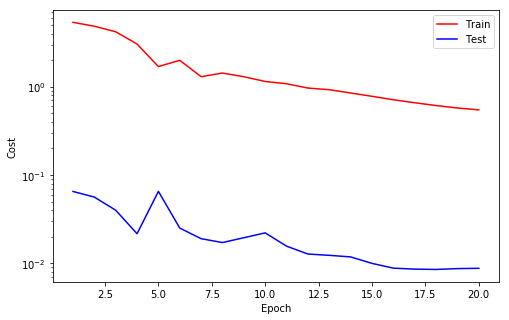

==> EarlyStop patience =  2 | Best test_cost: 0.0085

Epoch    21
Train_cost  = 0.5275 | Test_cost  = 0.0088 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0085

Epoch    22
Train_cost  = 0.5101 | Test_cost  = 0.0082 | 

Epoch    23
Train_cost  = 0.4885 | Test_cost  = 0.0077 | 

Epoch    24
Train_cost  = 0.4702 | Test_cost  = 0.0075 | 

Epoch    25
Train_cost  = 0.4516 | Test_cost  = 0.0068 | 

Epoch    26
Train_cost  = 0.4374 | Test_cost  = 0.0064 | 

Epoch    27
Train_cost  = 0.4209 | Test_cost  = 0.0063 | 

Epoch    28
Train_cost  = 0.4034 | Test_cost  = 0.0058 | 

Epoch    29
Train_cost  = 0.3950 | Test_cost  = 0.0056 | 

Epoch    30
Train_cost  = 0.3774 | Test_cost  = 0.0053 | 

Epoch    31
Train_cost  = 0.3601 | Test_cost  = 0.0051 | 

Epoch    32
Train_cost  = 0.3502 | Test_cost  = 0.0050 | 

Epoch    33
Train_cost  = 0.3369 | Test_cost  = 0.0047 | 

Epoch    34
Train_cost  = 0.3259 | Test_cost  = 0.0045 | 

Epoch    35
Train_cost  = 0.3123 | Test_cost  = 0.0043 | 

Epoch   

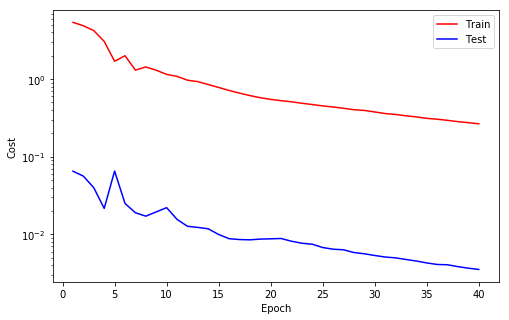


Epoch    41
Train_cost  = 0.2508 | Test_cost  = 0.0034 | 

Epoch    42
Train_cost  = 0.2445 | Test_cost  = 0.0033 | 

Epoch    43
Train_cost  = 0.2351 | Test_cost  = 0.0031 | 

Epoch    44
Train_cost  = 0.2300 | Test_cost  = 0.0032 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0031

Epoch    45
Train_cost  = 0.2192 | Test_cost  = 0.0029 | 

Epoch    46
Train_cost  = 0.2135 | Test_cost  = 0.0029 | 

Epoch    47
Train_cost  = 0.2072 | Test_cost  = 0.0028 | 

Epoch    48
Train_cost  = 0.2004 | Test_cost  = 0.0029 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0028

Epoch    49
Train_cost  = 0.1947 | Test_cost  = 0.0026 | 

Epoch    50
Train_cost  = 0.1871 | Test_cost  = 0.0026 | 

Epoch    51
Train_cost  = 0.1810 | Test_cost  = 0.0024 | 

Epoch    52
Train_cost  = 0.1748 | Test_cost  = 0.0024 | 

Epoch    53
Train_cost  = 0.1690 | Test_cost  = 0.0023 | 

Epoch    54
Train_cost  = 0.1643 | Test_cost  = 0.0024 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0023

Epoch    55
Tr

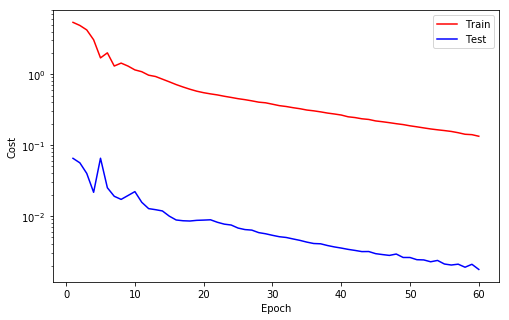


Epoch    61
Train_cost  = 0.1294 | Test_cost  = 0.0017 | 

Epoch    62
Train_cost  = 0.1266 | Test_cost  = 0.0017 | 

Epoch    63
Train_cost  = 0.1242 | Test_cost  = 0.0016 | 

Epoch    64
Train_cost  = 0.1165 | Test_cost  = 0.0015 | 

Epoch    65
Train_cost  = 0.1128 | Test_cost  = 0.0015 | 

Epoch    66
Train_cost  = 0.1095 | Test_cost  = 0.0014 | 

Epoch    67
Train_cost  = 0.1063 | Test_cost  = 0.0013 | 

Epoch    68
Train_cost  = 0.1016 | Test_cost  = 0.0013 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0013

Epoch    69
Train_cost  = 0.0975 | Test_cost  = 0.0012 | 

Epoch    70
Train_cost  = 0.0950 | Test_cost  = 0.0011 | 

Epoch    71
Train_cost  = 0.0891 | Test_cost  = 0.0011 | 

Epoch    72
Train_cost  = 0.0861 | Test_cost  = 0.0010 | 

Epoch    73
Train_cost  = 0.0830 | Test_cost  = 0.0011 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0010

Epoch    74
Train_cost  = 0.0821 | Test_cost  = 0.0009 | 

Epoch    75
Train_cost  = 0.0761 | Test_cost  = 0.0009 | 

Epoch   

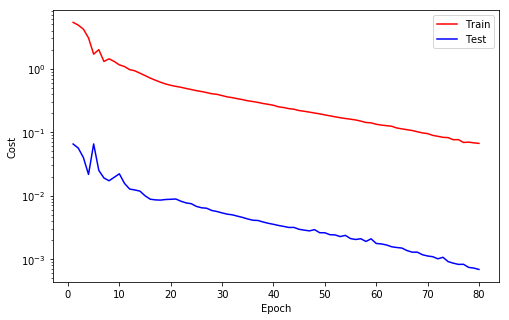


Epoch    81
Train_cost  = 0.0620 | Test_cost  = 0.0007 | 

Epoch    82
Train_cost  = 0.0596 | Test_cost  = 0.0006 | 

Epoch    83
Train_cost  = 0.0547 | Test_cost  = 0.0006 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0006

Epoch    84
Train_cost  = 0.0504 | Test_cost  = 0.0005 | 

Epoch    85
Train_cost  = 0.0489 | Test_cost  = 0.0005 | 

Epoch    86
Train_cost  = 0.0483 | Test_cost  = 0.0004 | 

Epoch    87
Train_cost  = 0.0465 | Test_cost  = 0.0004 | 

Epoch    88
Train_cost  = 0.0434 | Test_cost  = 0.0004 | 

Epoch    89
Train_cost  = 0.0420 | Test_cost  = 0.0004 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0004

Epoch    90
Train_cost  = 0.0414 | Test_cost  = 0.0003 | 

Epoch    91
Train_cost  = 0.0380 | Test_cost  = 0.0003 | 

Epoch    92
Train_cost  = 0.0350 | Test_cost  = 0.0003 | 

Epoch    93
Train_cost  = 0.0321 | Test_cost  = 0.0002 | 

Epoch    94
Train_cost  = 0.0326 | Test_cost  = 0.0002 | 

Epoch    95
Train_cost  = 0.0329 | Test_cost  = 0.0003 | 
==> Early

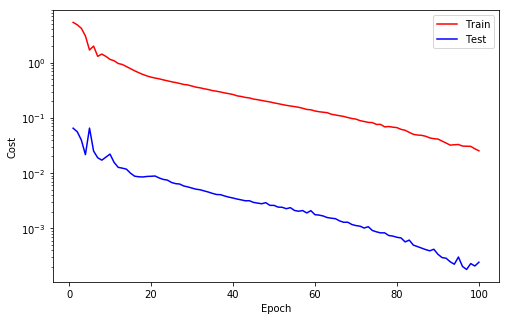

==> EarlyStop patience =  3 | Best test_cost: 0.0002

Epoch   101
Train_cost  = 0.0256 | Test_cost  = 0.0002 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0002

Epoch   102
Train_cost  = 0.0240 | Test_cost  = 0.0001 | 

Epoch   103
Train_cost  = 0.0229 | Test_cost  = 0.0001 | 

Epoch   104
Train_cost  = 0.0213 | Test_cost  = 0.0001 | 

Epoch   105
Train_cost  = 0.0194 | Test_cost  = 0.0001 | 

Epoch   106
Train_cost  = 0.0199 | Test_cost  = 0.0001 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0001

Epoch   107
Train_cost  = 0.0192 | Test_cost  = 0.0001 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0001

Epoch   108
Train_cost  = 0.0196 | Test_cost  = 0.0001 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0001

Epoch   109
Train_cost  = 0.0193 | Test_cost  = 0.0002 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0001

Epoch   110
Train_cost  = 0.0184 | Test_cost  = 0.0001 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0001
==> Execute Early Stopping at epoch: 11

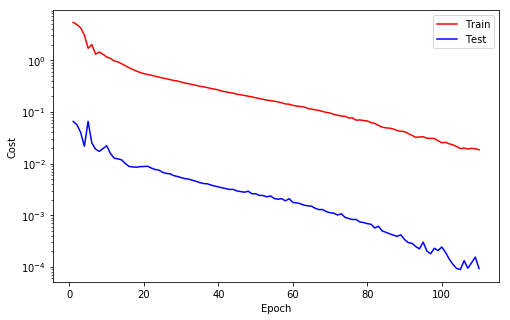

(N, S, F): (1939, 1, 1)
Note: last 0 data excluded

(N, S, F): (485, 1, 1)
Note: last 0 data excluded



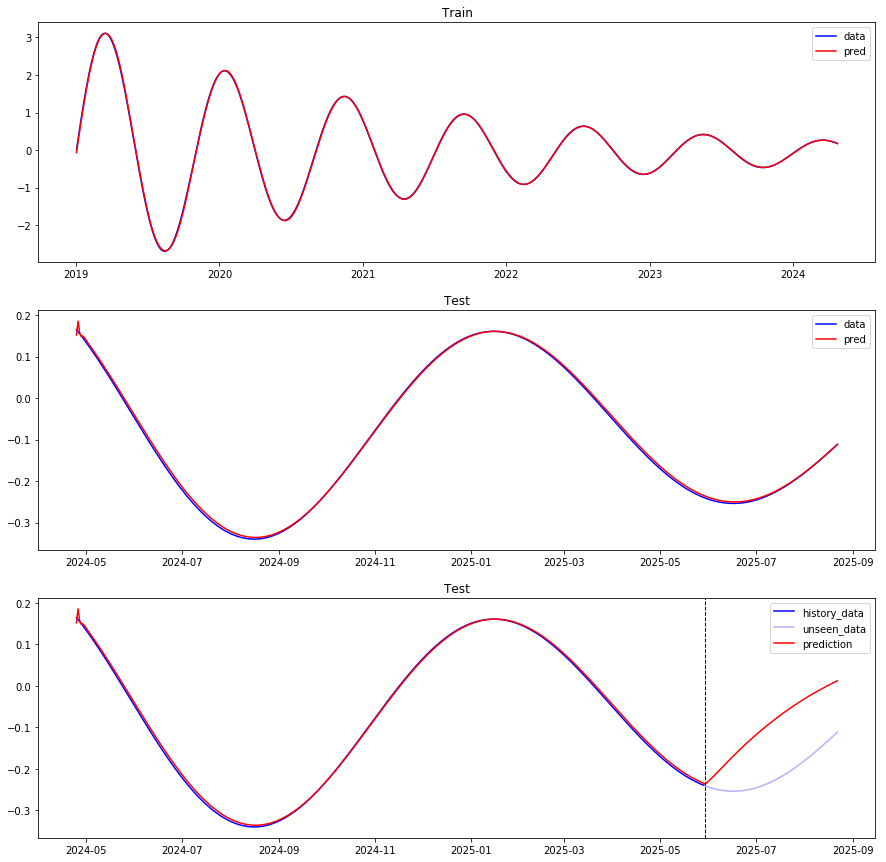

In [5]:
if data == "damped_sine":
    df = pd.read_csv("data/sine_new.csv", parse_dates=["Date"], index_col="Date")
    df.value = df.value.transform(lambda x: (x-x.mean())/x.std())
    col = "value"    
elif data == "jkse":
    df = pd.read_csv("data/jkse.csv", parse_dates=["Date"], index_col="Date")
    df = df[~df.price.isna()]
    df.price = df.price.transform(lambda x: (x-x.mean())/x.std())
    col = "price"

ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)

train_set = TimeSeriesDataset(ts_train, col, config.seq_len)
trainloader = DataLoader(train_set, batch_size=config.batch_size)

test_set = TimeSeriesDataset(ts_test, col, config.seq_len)
testloader = DataLoader(test_set, batch_size=config.batch_size)

model = RNN(config.cell_type, config.input_size, config.output_size, config.hidden_size, 
            config.num_layers, config.dropout, config.bidirectional).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=lr)
callback = Callback(model, config, outdir=f'model/{data}/')

while True:    
    ## Training ##
    hidden = None
    model.train()
    cost = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
    
        output, hidden = model(inputs, None)
        loss = criterion(output, targets)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()    
        
        if config.cell_type == "lstm":
            hidden[0].detach_()
            hidden[1].detach_()
        else:
            hidden.detach_()
        
        cost += loss.item()
    train_cost = cost
    
    ## Testing ##
    with torch.no_grad():
        model.eval()
        cost = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            output, hidden = model(inputs, None)
            loss = criterion(output, targets)
        
            cost += loss.item()
        test_cost = cost

    ## Callback ##
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()    
        weights = torch.load(f"model/{data}/weights_best.pth", map_location="cpu")
        model.load_state_dict(weights)
        break
        
# Forecast
train_forecast_set = TimeSeriesDataset(ts_train, col, 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, col, 1)
testforecastloader = DataLoader(test_forecast_set)

plt.figure(figsize=(15, 15))
    
plt.subplot(311)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(312)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

plt.subplot(313)
pred4pred(model, test_forecast_set, testforecastloader, device, n_prior=400, n_forecast=100)
plt.title("Test");